> 텍스트 마이닝 2020. 8. 4. 정규 세션 과제  (4기 김연수)
     1. 텍스트 전처리 
    - 파일 읽어와 형태소 태깅까지
     2. 빈도 분석 
    - Counter 모듈을 이용한 빈도 수 기준 상위10개 '명사' 단어 추출과 워드클라우드 생성
     3. 네트워크 분석
    - NetworkX 모듈을 이용해 빈도 수 기준 상위 15개 '명사' 단어로 네트워크를 생성
    - degree / betweenness / closeness / eigenvector centrality 분석을 수행 후 해석
    - 시각화

# 한글 텍스트 전처리할 수 있는 형태로 만들기

In [103]:
with open("대한민국 헌법개정안.txt", 'r', encoding="utf-8") as f:
    text = f.readlines()

In [104]:
text

['전문 \n',
 '\n',
 '유구한 역사와 전통에 빛나는 우리 대한국민은 3ㆍ1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4ㆍ19혁명, 부마민주항쟁과 5ㆍ18민주화운동, 6ㆍ10항쟁의 민주이념을 계승하고, 조국의 민주개혁과 평화 통일의 사명을 바탕으로 정의ㆍ인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자치와 분권을 강화하고, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치ㆍ경제ㆍ사회ㆍ문화의 모든 영역에서 개개인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상과 지역 간 균형발전을 도모하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 자연과의 공존 속에서 우리들과 미래 세대의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 9차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. \n',
 '\n',
 '\n',
 '제1장 총강 \n',
 '\n',
 '\n',
 '제1조 ① 대한민국은 민주공화국이다. \n',
 '\n',
 '② 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n',
 '\n',
 '③ 대한민국은 지방분권국가를 지향한다. \n',
 '\n',
 '\n',
 '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다. \n',
 '\n',
 '② 국가는 법률로 정하는 바에 따라 재외국민을 보호할 의무를 진다.\n',
 '\n',
 '\n',
 '제3조 ① 대한민국의 영토는 한반도와 그 부속도서(附屬島嶼)로 한다.\n',
 '\n',
 '② 대한민국의 수도에 관한 사항은 법률로 정한다. \n',
 '\n',
 '\n',
 '제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 바탕을 둔 평화 통일 정책을 수립하여 추진한다. \n',
 '\n',
 '\n',
 '제5조 ① 대한민국은 국제평화를 

In [105]:
# 리스트 컴프리핸션을 이용해 빈줄 및 문장 양 끝난의 공백 제거
text_strip = list([i.strip() for i in text if i != '\n'])
 # \n 이 아닌 모든 요소들의 앞뒤 공백 제거

In [106]:
# 텍스트 전처리를 위해 다시 하나의 string으로 만들기
text_join = ' '.join(text_strip)

In [107]:
text_join

'전문 유구한 역사와 전통에 빛나는 우리 대한국민은 3ㆍ1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4ㆍ19혁명, 부마민주항쟁과 5ㆍ18민주화운동, 6ㆍ10항쟁의 민주이념을 계승하고, 조국의 민주개혁과 평화 통일의 사명을 바탕으로 정의ㆍ인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자치와 분권을 강화하고, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치ㆍ경제ㆍ사회ㆍ문화의 모든 영역에서 개개인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상과 지역 간 균형발전을 도모하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 자연과의 공존 속에서 우리들과 미래 세대의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 9차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. 제1장 총강 제1조 ① 대한민국은 민주공화국이다. ② 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다. ③ 대한민국은 지방분권국가를 지향한다. 제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다. ② 국가는 법률로 정하는 바에 따라 재외국민을 보호할 의무를 진다. 제3조 ① 대한민국의 영토는 한반도와 그 부속도서(附屬島嶼)로 한다. ② 대한민국의 수도에 관한 사항은 법률로 정한다. 제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 바탕을 둔 평화 통일 정책을 수립하여 추진한다. 제5조 ① 대한민국은 국제평화를 유지하기 위하여 노력하고 침략적 전쟁을 부인한다. ② 국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며 그 정치적 중립성은 준수된다. 제6조 ① 헌법에 따라 체결ㆍ공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다. ② 외국인에게는 국제법과 조약으로 정하는 바에 따라 그 지위를 보장한다. 제7조 ① 공무

# 본격적인 한글 텍스트 전처리 시작

## Text cleaning 

In [108]:
import re

In [109]:
# 특수문자 제거
# re.sub(r"[~~~]) => 여기서의 r 은 뒤에 있는 것을 하나의 뭉터기 (즉, 단어)로 만들어주는 역할
# ^ : 제외
# \d : [0-9] 와 동일
# \s : 공백을 의미 [\t\n\r\f\v]와 동일
# \w : 숫자 또는 문자를 의미 (유니코드인 경우 숫자, 밑줄(underscore, '_')을 포함하는 모든 언어의 표현 가능한 문자
filtered_content = re.sub(r'[^\d\s\w\.]', ' ', text_join )

In [110]:
filtered_content # 여기까지는 그냥 특수기호들 제거

'전문 유구한 역사와 전통에 빛나는 우리 대한국민은 3ㆍ1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4ㆍ19혁명  부마민주항쟁과 5ㆍ18민주화운동  6ㆍ10항쟁의 민주이념을 계승하고  조국의 민주개혁과 평화 통일의 사명을 바탕으로 정의ㆍ인도와 동포애로써 민족의 단결을 공고히 하고  모든 사회적 폐습과 불의를 타파하며  자치와 분권을 강화하고  자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치ㆍ경제ㆍ사회ㆍ문화의 모든 영역에서 개개인의 기회를 균등히 하고  능력을 최고도로 발휘하게 하며  자유와 권리에 따르는 책임과 의무를 완수하게 하여  안으로는 국민생활의 균등한 향상과 지역 간 균형발전을 도모하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 자연과의 공존 속에서 우리들과 미래 세대의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 9차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. 제1장 총강 제1조 ① 대한민국은 민주공화국이다. ② 대한민국의 주권은 국민에게 있고  모든 권력은 국민으로부터 나온다. ③ 대한민국은 지방분권국가를 지향한다. 제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다. ② 국가는 법률로 정하는 바에 따라 재외국민을 보호할 의무를 진다. 제3조 ① 대한민국의 영토는 한반도와 그 부속도서 附屬島嶼 로 한다. ② 대한민국의 수도에 관한 사항은 법률로 정한다. 제4조 대한민국은 통일을 지향하며  자유민주적 기본질서에 바탕을 둔 평화 통일 정책을 수립하여 추진한다. 제5조 ① 대한민국은 국제평화를 유지하기 위하여 노력하고 침략적 전쟁을 부인한다. ② 국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며 그 정치적 중립성은 준수된다. 제6조 ① 헌법에 따라 체결ㆍ공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다. ② 외국인에게는 국제법과 조약으로 정하는 바에 따라 그 지위를 보장한다. 제7조 ① 공무

In [111]:
# 이걸로 원기호 및 ㆍ 제거
filtered_content = re.sub(r'[①②③④⑤⑥⑦⑧⑨⑩ㆍ]', ' ', filtered_content)

In [112]:
# only 한글만 남은 것을 볼 수 있음
filtered_content

'전문 유구한 역사와 전통에 빛나는 우리 대한국민은 3 1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4 19혁명  부마민주항쟁과 5 18민주화운동  6 10항쟁의 민주이념을 계승하고  조국의 민주개혁과 평화 통일의 사명을 바탕으로 정의 인도와 동포애로써 민족의 단결을 공고히 하고  모든 사회적 폐습과 불의를 타파하며  자치와 분권을 강화하고  자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치 경제 사회 문화의 모든 영역에서 개개인의 기회를 균등히 하고  능력을 최고도로 발휘하게 하며  자유와 권리에 따르는 책임과 의무를 완수하게 하여  안으로는 국민생활의 균등한 향상과 지역 간 균형발전을 도모하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 자연과의 공존 속에서 우리들과 미래 세대의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 9차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. 제1장 총강 제1조   대한민국은 민주공화국이다.   대한민국의 주권은 국민에게 있고  모든 권력은 국민으로부터 나온다.   대한민국은 지방분권국가를 지향한다. 제2조   대한민국의 국민이 되는 요건은 법률로 정한다.   국가는 법률로 정하는 바에 따라 재외국민을 보호할 의무를 진다. 제3조   대한민국의 영토는 한반도와 그 부속도서 附屬島嶼 로 한다.   대한민국의 수도에 관한 사항은 법률로 정한다. 제4조 대한민국은 통일을 지향하며  자유민주적 기본질서에 바탕을 둔 평화 통일 정책을 수립하여 추진한다. 제5조   대한민국은 국제평화를 유지하기 위하여 노력하고 침략적 전쟁을 부인한다.   국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며 그 정치적 중립성은 준수된다. 제6조   헌법에 따라 체결 공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.   외국인에게는 국제법과 조약으로 정하는 바에 따라 그 지위를 보장한다. 제7조   공무

## 형태소 분석기를 이용해 분류하기

In [14]:
import konlpy

In [15]:
twitter = konlpy.tag.Twitter()
twitter_morphs = twitter.pos(filtered_content)

In [16]:
twitter_morphs

[('전문', 'Noun'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa'),
 ('건립', 'Noun'),
 ('된', 'Verb'),
 ('대한민국', 'Noun'),
 ('임시정부', 'Noun'),
 ('의', 'Josa'),
 ('법', 'Noun'),
 ('통과', 'Noun'),
 ('불의', 'Noun'),
 ('에', 'Josa'),
 ('항거', 'Noun'),
 ('한', 'Josa'),
 ('4', 'Number'),
 ('19', 'Number'),
 ('혁명', 'Noun'),
 ('부마', 'Noun'),
 ('민주', 'Noun'),
 ('항쟁', 'Noun'),
 ('과', 'Josa'),
 ('5', 'Number'),
 ('18', 'Number'),
 ('민주화', 'Noun'),
 ('운동', 'Noun'),
 ('6', 'Number'),
 ('10', 'Number'),
 ('항쟁', 'Noun'),
 ('의', 'Josa'),
 ('민주', 'Noun'),
 ('이념', 'Noun'),
 ('을', 'Josa'),
 ('계승', 'Noun'),
 ('하고', 'Josa'),
 ('조국', 'Noun'),
 ('의', 'Josa'),
 ('민주', 'Noun'),
 ('개혁', 'Noun'),
 ('과', 'Josa'),
 ('평화', 'Noun'),
 ('통일', 'Noun'),
 ('의', 'Josa'),
 ('사명', 'Noun'),
 ('을', 'Josa'),
 ('바탕',

- komoran 분석기도 이용해보자

In [17]:
komoran = konlpy.tag.Komoran()
komoran_morphs = komoran.pos(filtered_content)
komoran_morphs

[('전문', 'NNG'),
 ('유구', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKB'),
 ('빛나', 'VV'),
 ('는', 'ETM'),
 ('우리', 'NP'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('국민', 'NNP'),
 ('은', 'JX'),
 ('3', 'SN'),
 ('1', 'SN'),
 ('운동', 'NNP'),
 ('으로', 'JKB'),
 ('건립', 'NNG'),
 ('되', 'XSV'),
 ('ㄴ', 'ETM'),
 ('대한민국', 'NNP'),
 ('임시', 'NNG'),
 ('정부', 'NNG'),
 ('의', 'JKG'),
 ('법통', 'NNG'),
 ('과', 'JC'),
 ('불의', 'NNP'),
 ('에', 'JKB'),
 ('항거', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETM'),
 ('4', 'SN'),
 ('19', 'SN'),
 ('혁명', 'NNP'),
 ('부마민주항쟁', 'NNP'),
 ('과', 'JC'),
 ('5', 'SN'),
 ('18', 'SN'),
 ('민주화', 'NNP'),
 ('운동', 'NNP'),
 ('6', 'SN'),
 ('10', 'SN'),
 ('항쟁', 'NNG'),
 ('의', 'JKG'),
 ('민주', 'NNP'),
 ('이념', 'NNG'),
 ('을', 'JKO'),
 ('계승', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('조국', 'NNP'),
 ('의', 'JKG'),
 ('민주개혁', 'NNG'),
 ('과', 'JC'),
 ('평화', 'NNG'),
 ('통일', 'NNG'),
 ('의', 'JKG'),
 ('사명', 'NNG'),
 ('을', 'JKO'),
 ('바탕', 'NNG'),
 ('으로', 'JKB'),
 ('정', 'NNP'),
 ('의', 'JKG'),

- komoran은 명사만 따로 볼 수 있는 함수를 제공.
- twitter는 명사 단어만 추출하는 알고리즘을 짜줘야 함.

In [18]:
komoran_nouns = komoran.nouns(filtered_content)
komoran_nouns

['전문',
 '역사',
 '전통',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시',
 '정부',
 '법통',
 '불의',
 '항거',
 '혁명',
 '부마민주항쟁',
 '민주화',
 '운동',
 '항쟁',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주개혁',
 '평화',
 '통일',
 '사명',
 '바탕',
 '정',
 '인도',
 '동포애',
 '민족',
 '단결',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자치',
 '분권',
 '강화',
 '자율',
 '조화',
 '바탕',
 '자유',
 '민주',
 '기본',
 '질서',
 '정치',
 '경제',
 '사회',
 '문화',
 '영역',
 '개개인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '안',
 '국민',
 '생활',
 '균등',
 '향상',
 '지역',
 '간',
 '균형발전',
 '도모',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '자연',
 '공존',
 '속',
 '미래',
 '세대',
 '안전',
 '자유',
 '행복',
 '확보',
 '것',
 '다짐',
 '년',
 '7월 12일',
 '제정',
 '차',
 '개정',
 '헌법',
 '국회',
 '의결',
 '국민',
 '투표',
 '개정',
 '장',
 '강',
 '대한민국',
 '민주공화국',
 '이다',
 '대한민국',
 '주권',
 '국민',
 '권력',
 '국민',
 '대한민국',
 '지방',
 '분권',
 '국가',
 '지향',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '국가',
 '법률',
 '바',
 '재외국민',
 '보호',
 '의무',
 '진다',
 '대한민국',
 '영토',
 '한반도',
 '부속',
 '도서',
 '로',
 '대한민국',
 '수도',
 '사항',
 '법률',
 '대한민국',
 '통일',
 '지향',
 '자유',
 

In [19]:
# 트위터에서 Noun만 가져오는 법
# 튜플 형태에서 (word, pos) 인 것

Noun_words = list([word for word, pos in twitter_morphs if pos=='Noun'])
print(Noun_words)

['전문', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '혁명', '부마', '민주', '항쟁', '민주화', '운동', '항쟁', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '바탕', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자치', '분권', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '개개인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '지역', '간', '균형발전', '도모', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '자연', '공존', '속', '우리', '미래', '세대', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '지방', '분권', '국가', '지향', '제', '대한민국', '국민', '요건', '법률', '정', '국가', '법률', '정', '바', '재외국민', '보호', '의무', '제', '대한민국', '영토', '한반도', '그', '부속', '도서', '로', '대한민국', '수도', '관', '사항', '법률', '정', '제', '대한민국', '통일', '지향', '자유민주', '질서', '바탕', '평화', '통일', '정책', '수립', '추진', '제', '대한민국', '국

## 불용어 제거

In [20]:
stopwords = ["안", "것", "제", "장", "수", "은", "구", "그", "및", "바", "이", "의", "정", 
             "등", "겸", "항", "로서"]

unique_Noun_words = set(komoran_nouns) # 중복제거
for word in unique_Noun_words:
    if word in stopwords or len(word) == 1: # 길이가 하나이거나 stopwords에 들어가 있는 것이면
        while word in komoran_nouns: # 중복되어서 들어가있는 것들도 while을 통해서 다 지워주기
            komoran_nouns.remove(word)

In [21]:
print(len(komoran_nouns))
print(len(set(komoran_nouns))) 
# 잉 중복이 아직도 있네요?
# 이 중복은 당연한 것 = 지우지 않은 (=쓸모있는 단어들)이 몇번씩 들어갔는지 볼거니까

3629
889


## 빈도 분석

- 빈도 분석을 위해서는 counter 모듈을 사용해준다

In [22]:
from collections import Counter

In [23]:
c = Counter(komoran_nouns)
c

Counter({'전문': 3,
         '역사': 1,
         '전통': 1,
         '국민': 58,
         '운동': 4,
         '건립': 1,
         '대한민국': 11,
         '임시': 1,
         '정부': 45,
         '법통': 1,
         '불의': 2,
         '항거': 1,
         '혁명': 1,
         '부마민주항쟁': 1,
         '민주화': 2,
         '항쟁': 1,
         '민주': 5,
         '이념': 1,
         '계승': 2,
         '조국': 3,
         '민주개혁': 1,
         '평화': 7,
         '통일': 7,
         '사명': 2,
         '바탕': 6,
         '인도': 1,
         '동포애': 1,
         '민족': 1,
         '단결': 3,
         '사회': 10,
         '폐습': 1,
         '타파': 1,
         '자치': 19,
         '분권': 7,
         '강화': 4,
         '자율': 4,
         '조화': 2,
         '자유': 14,
         '기본': 12,
         '질서': 5,
         '정치': 11,
         '경제': 20,
         '문화': 5,
         '영역': 5,
         '개개인': 1,
         '기회': 4,
         '능력': 2,
         '최고': 10,
         '도로': 1,
         '발휘': 1,
         '권리': 33,
         '책임': 6,
         '의무': 18,
         '완수': 1,
     

In [24]:
c.most_common(10)

[('법률', 161),
 ('대통령', 88),
 ('국가', 81),
 ('국회', 70),
 ('국민', 58),
 ('헌법', 50),
 ('경우', 49),
 ('지방', 48),
 ('정부', 45),
 ('사항', 40)]

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

In [26]:
# 폰트 지정
FONT_PATH = 'AppleGothic'

In [27]:
noun_text = ' '.join(komoran_nouns)
noun_text

'전문 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 혁명 부마민주항쟁 민주화 운동 항쟁 민주 이념 계승 조국 민주개혁 평화 통일 사명 바탕 인도 동포애 민족 단결 사회 폐습 불의 타파 자치 분권 강화 자율 조화 바탕 자유 민주 기본 질서 정치 경제 사회 문화 영역 개개인 기회 능력 최고 도로 발휘 자유 권리 책임 의무 완수 국민 생활 균등 향상 지역 균형발전 도모 항구 세계 평화 인류 공영 이바지 자연 공존 미래 세대 안전 자유 행복 확보 다짐 7월 12일 제정 개정 헌법 국회 의결 국민 투표 개정 대한민국 민주공화국 이다 대한민국 주권 국민 권력 국민 대한민국 지방 분권 국가 지향 대한민국 국민 요건 법률 국가 법률 재외국민 보호 의무 진다 대한민국 영토 한반도 부속 도서 대한민국 수도 사항 법률 대한민국 통일 지향 자유 민주 기본 질서 바탕 평화 통일 정책 수립 추진 대한민국 국제 평화 유지 노력 침략 전쟁 부인 국군 국가 안전 보장 국토방위 신성 의무 수행 사명 정치 중립 준수 헌법 체결 공포 조약 일반 승인 국제 법규 국내법 효력 외국인 국제법 조약 지위 보장 공무원 국민 전체 봉사 국민 책임 진다 공무원 신분 법률 보장 공무원 직무 수행 정치 중립 공무원 재직 퇴직 공무원 직무 공정 청렴 훼손 정당 자유 설립 복수 정당 보장 정당 목적 조직 활동 민주 정당 법률 국가 보호 국가 목적 공정 기준 법률 정당 운영 필요 자금 보조 정부 정당 목적 활동 민주 기본 질서 위반 헌법재판소 정당 해산 제소 제소 정당 헌법재판소 심판 해산 국가 문화 자율 다양성 증진 전통문화 발전 계승 노력 기본 권리 의무 사람 인간 존엄 가치 행복 추구 권리 국가 개인 불가침 기본 인권 확인 보장 의무 진다 사람 평등 성별 종교 장애 연령 인종 지역 사회 신분 이유 정치 경제 사회 문화 생활 영역 차별 국가 성별 장애 차별 상태 시정 실질 평등 실현 노력 사회 특수 계급 제도 인정 형태 창설 훈장 영전 효력 특권 사람 생명 신체 정신 훼손 권리 사람 신체의 자유

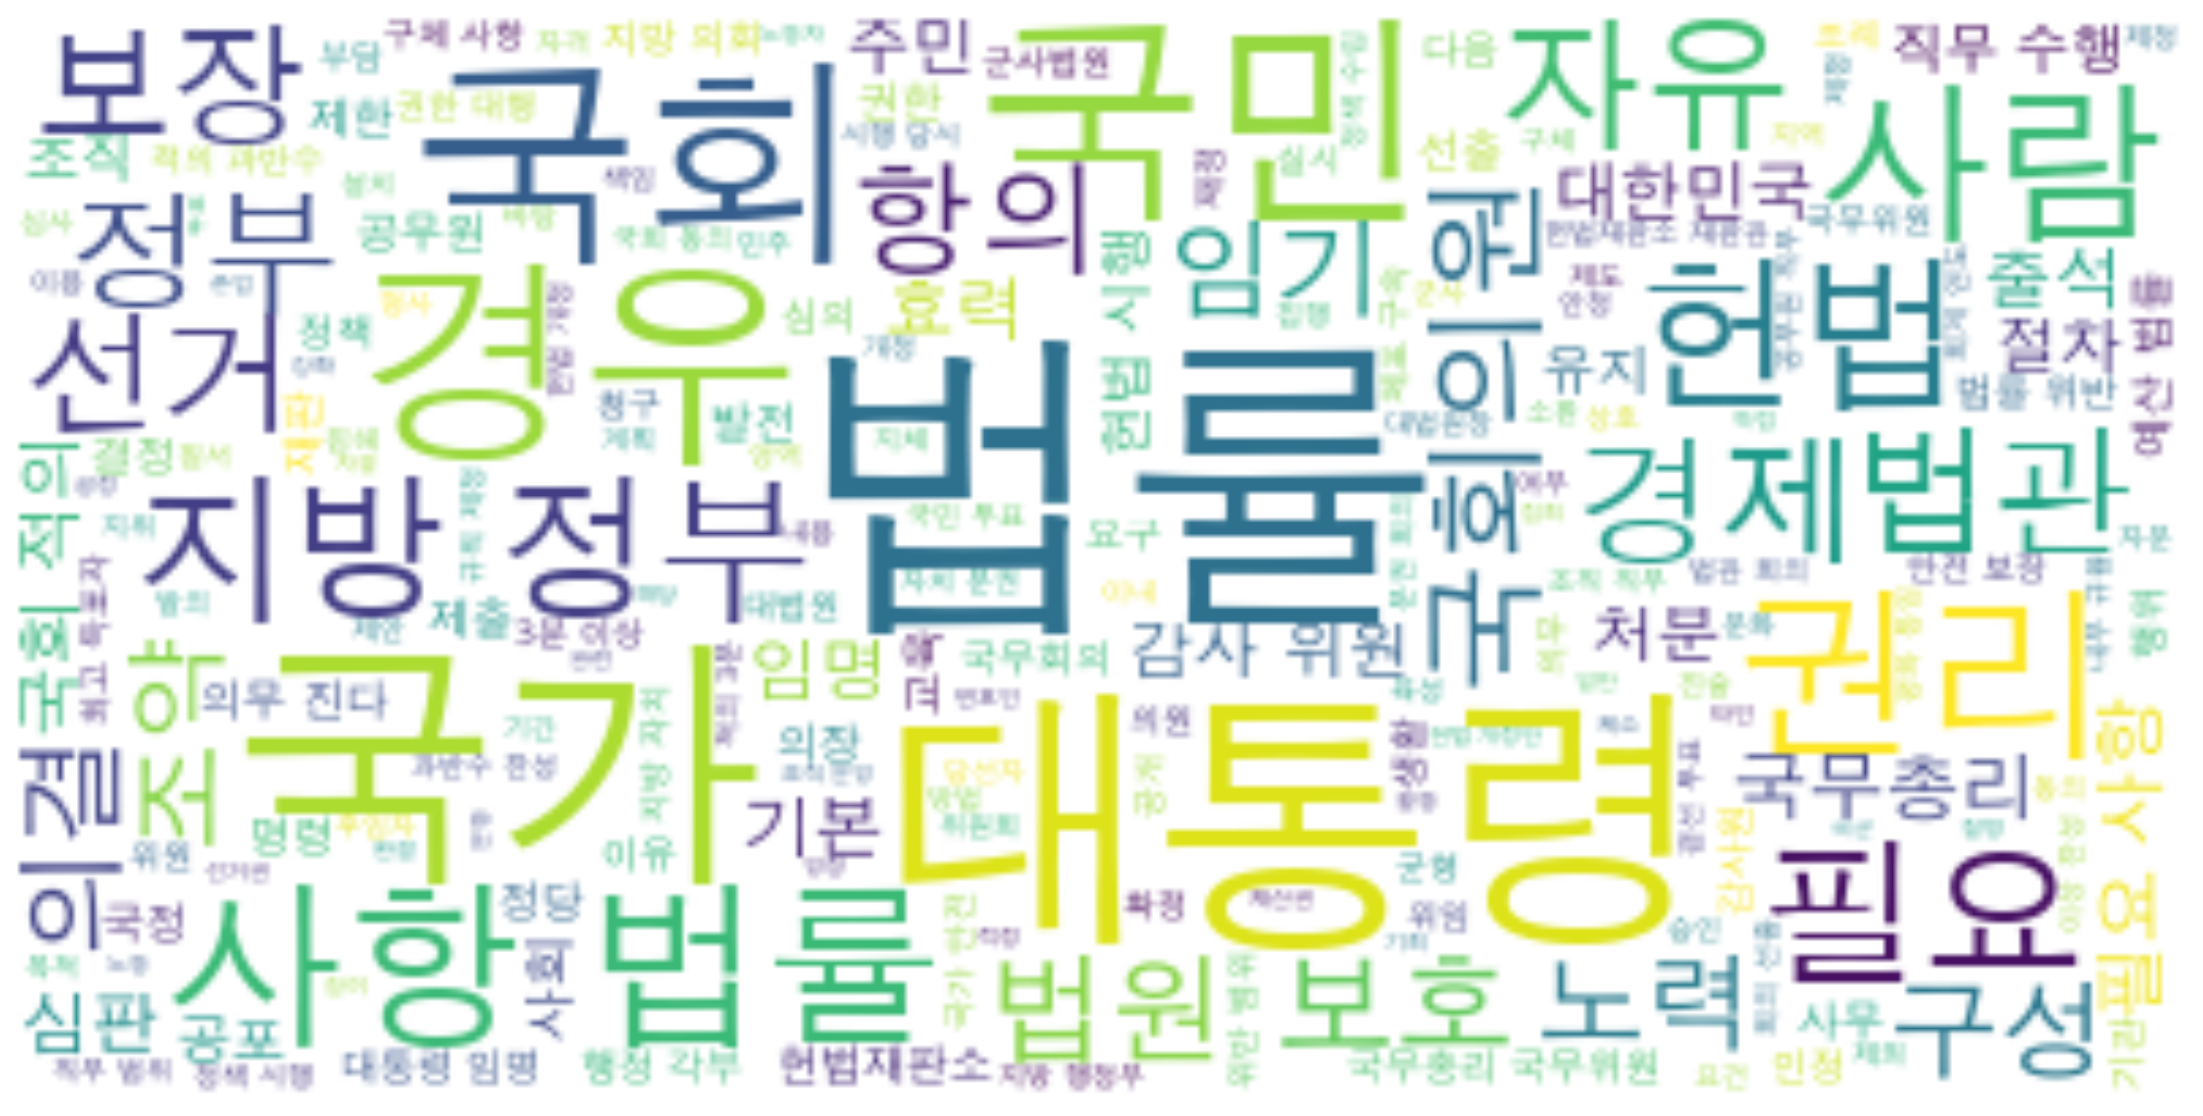

In [28]:
wordcloud = WordCloud(max_font_size=60, relative_scaling=.5,
                        font_path=FONT_PATH, background_color="white")
wordcloud.generate(noun_text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 미등록 단어 문제

### Twitter 이용
- konlpy에 들어있는 Twitter 모듈을 이용하면 사전을 직접 추가 가능
- 여기서의 ckonlpy는 pip install customized_konlpy 에서 온 것
- add_dictionary 함수를 통해 추가하는 것은 메모리 상에 존재하는 임시 사전이므로 매번 새롭게 등록해야 함

In [29]:
from ckonlpy.tag import Twitter
twitter = Twitter()

In [30]:
twitter.add_dictionary(['대한국민', '기본'], 'Noun')

In [31]:
twitter_morphs = twitter.pos(filtered_content)
twitter_morphs

[('전문', 'Noun'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대한국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa'),
 ('건립', 'Noun'),
 ('된', 'Verb'),
 ('대한민국', 'Noun'),
 ('임시정부', 'Noun'),
 ('의', 'Josa'),
 ('법', 'Noun'),
 ('통과', 'Noun'),
 ('불의', 'Noun'),
 ('에', 'Josa'),
 ('항거', 'Noun'),
 ('한', 'Josa'),
 ('4', 'Number'),
 ('19', 'Number'),
 ('혁명', 'Noun'),
 ('부마', 'Noun'),
 ('민주', 'Noun'),
 ('항쟁', 'Noun'),
 ('과', 'Josa'),
 ('5', 'Number'),
 ('18', 'Number'),
 ('민주화', 'Noun'),
 ('운동', 'Noun'),
 ('6', 'Number'),
 ('10', 'Number'),
 ('항쟁', 'Noun'),
 ('의', 'Josa'),
 ('민주', 'Noun'),
 ('이념', 'Noun'),
 ('을', 'Josa'),
 ('계승', 'Noun'),
 ('하고', 'Josa'),
 ('조국', 'Noun'),
 ('의', 'Josa'),
 ('민주', 'Noun'),
 ('개혁', 'Noun'),
 ('과', 'Josa'),
 ('평화', 'Noun'),
 ('통일', 'Noun'),
 ('의', 'Josa'),
 ('사명', 'Noun'),
 ('을', 'Josa'),
 ('바탕', 'Noun'),
 ('으로', 'Josa'),
 ('정의', 'No

# 네트워크 분석

In [33]:
import networkx as nx

## networkx 패키지 활용 방법
1) g = nx.Graph()로 인스턴스 생성

2) g.add_nodes_from(리스트)로 노드 생성

3) g.edges()로 edge 공간 생성

4) g.add_edges_from([튜플, 튜플, 튜플, ...])로 edge 생성

In [34]:
c.most_common(15)
myword = c.most_common(15)
myword = list(map(lambda x : x[0], myword))

In [43]:
myword

['법률',
 '대통령',
 '국가',
 '국회',
 '국민',
 '헌법',
 '경우',
 '지방',
 '정부',
 '사항',
 '필요',
 '권리',
 '사람',
 '법관',
 '보장']

In [ ]:
g = nx.Graph()
g.add_nodes_from(myword)

In [129]:
import itertools


def get_sentences(content):
    text1 = re.sub(r'[^\.\?\!\s\w\d]', ' ', content)
    text1 = re.sub(r'[①②③④⑤⑥⑦⑧⑨⑩ㆍ]', ' ', text1)
    text1 = re.sub(r'([\.\?\!])', r'\1 ', text1)
    sentences = re.split(r'[\.\?\!]\s+', text1)  #\s 는 공백을 의미함
    komoran = konlpy.tag.Komoran()
    sentences = [komoran.nouns(sentence) for sentence in sentences if len(sentence)>0]
    return sentences

In [114]:
def add_ties(g, sentence):

    if len(sentence) > 0 :

        selected_words=list(g.nodes())

        for pair in list(itertools.combinations(set(sentence), 2)):
            if pair[0] == pair[1]:
                continue
            if pair[0] in selected_words and pair[1] in selected_words:
                if pair in list(g.edges()) or (pair[1],pair[0]) in list(g.edges()): 
                    g[pair[0]][pair[1]]['weight'] += 1
                else:
                    g.add_edge(pair[0], pair[1], weight=1 )
        return g
    else:
        return g


    
def form_network(g, sentences):
    for sentence in sentences:
        g = add_ties(g, sentence)
        
    return g


def do_kr_sna(sentences, selected_words):
    G = nx.Graph()
    G.add_nodes_from(selected_words)
    G = form_network(G, sentences)
    
    return G

In [133]:
sentences = get_sentences(text_join)
g = do_kr_sna(sentences, myword)

In [134]:
g.nodes

NodeView(('법률', '대통령', '국가', '국회', '국민', '헌법', '경우', '지방', '정부', '사항', '필요', '권리', '사람', '법관', '보장'))

In [135]:
print('node 리스트 : ', g.nodes())
print('edge 리스트 : ', g.edges())
print('node 개수 : ', g.number_of_nodes())
print('edge 개수 ; ', g.number_of_edges())

node 리스트 :  ['법률', '대통령', '국가', '국회', '국민', '헌법', '경우', '지방', '정부', '사항', '필요', '권리', '사람', '법관', '보장']
edge 리스트 :  [('법률', '국민'), ('법률', '국가'), ('법률', '사항'), ('법률', '보장'), ('법률', '필요'), ('법률', '사람'), ('법률', '권리'), ('법률', '헌법'), ('법률', '경우'), ('법률', '국회'), ('법률', '대통령'), ('법률', '정부'), ('법률', '지방'), ('법률', '법관'), ('대통령', '국회'), ('대통령', '경우'), ('대통령', '정부'), ('대통령', '법관'), ('대통령', '헌법'), ('대통령', '국가'), ('대통령', '국민'), ('대통령', '사람'), ('대통령', '사항'), ('대통령', '필요'), ('대통령', '보장'), ('대통령', '지방'), ('국가', '지방'), ('국가', '보장'), ('국가', '필요'), ('국가', '권리'), ('국가', '사람'), ('국가', '경우'), ('국가', '국민'), ('국가', '사항'), ('국가', '국회'), ('국가', '정부'), ('국가', '헌법'), ('국회', '헌법'), ('국회', '권리'), ('국회', '국민'), ('국회', '정부'), ('국회', '사항'), ('국회', '경우'), ('국회', '지방'), ('국회', '필요'), ('국회', '법관'), ('국회', '사람'), ('국회', '보장'), ('국민', '헌법'), ('국민', '권리'), ('국민', '정부'), ('국민', '보장'), ('국민', '경우'), ('국민', '필요'), ('국민', '사항'), ('헌법', '권리'), ('헌법', '정부'), ('헌법', '사람'), ('헌법', '경우'), ('헌법', '법관'), ('헌법', '필요'), ('헌법', '지방'), ('

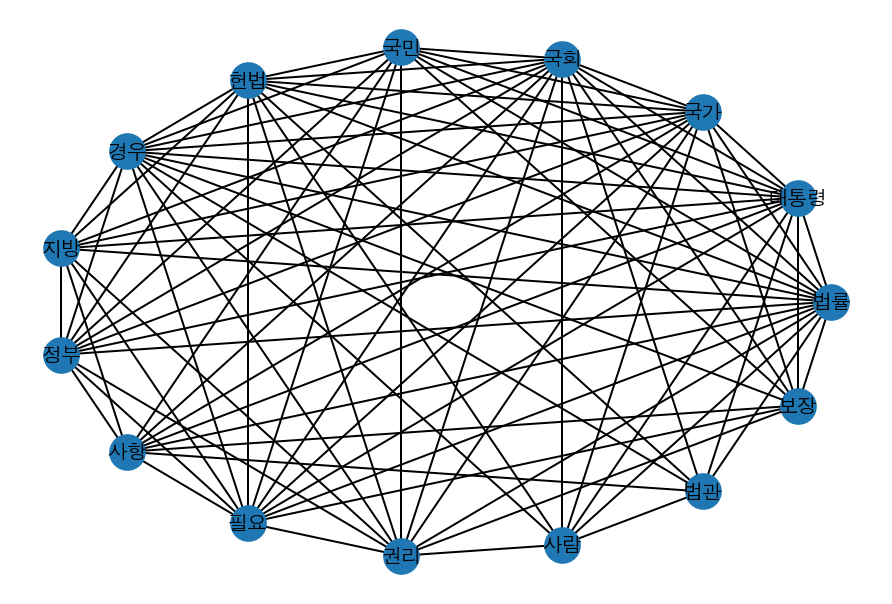

In [136]:
import matplotlib.font_manager as fm
font_name = 'AppleGothic'
pos = nx.shell_layout(g)
nx.draw(g, pos)
nx.draw_networkx_labels(g, pos, font_family = font_name, font_size=10)

plt.show()


In [137]:
# degree centrality
nx.degree_centrality(g)

{'법률': 1.0,
 '대통령': 0.9285714285714285,
 '국가': 0.9285714285714285,
 '국회': 1.0,
 '국민': 0.7857142857142857,
 '헌법': 0.8571428571428571,
 '경우': 0.9285714285714285,
 '지방': 0.7142857142857142,
 '정부': 0.7857142857142857,
 '사항': 0.7142857142857142,
 '필요': 0.8571428571428571,
 '권리': 0.7857142857142857,
 '사람': 0.5714285714285714,
 '법관': 0.5,
 '보장': 0.6428571428571428}

- 각 단어의 직접적인 영향력을 알 수 있는 수치
- 빈도가 높은 15개인만큼 서로 연관이 많아서 그런지 모두 0.5가 넘는 높은 수치가 나왔다
- 그 중에서도 법률, 국회는 모든 것과 연관이 있어 1이 나왔으며, 대통령, 국가, 경우(별로 중요하지 않은 단어이긴하지만) 도 높은 수치를 보였다

In [141]:
# betweenness centrality
nx.betweenness_centrality(g)

{'법률': 0.033359894074179795,
 '대통령': 0.02878946450375022,
 '국가': 0.02006842363985221,
 '국회': 0.033359894074179795,
 '국민': 0.007287157287157287,
 '헌법': 0.019471005185290904,
 '경우': 0.0274685631828489,
 '지방': 0.004692529692529693,
 '정부': 0.005791430791430793,
 '사항': 0.014787196930054074,
 '필요': 0.00975968475968476,
 '권리': 0.013178091749520322,
 '사람': 0.004766661909519052,
 '법관': 0.004517704517704518,
 '보장': 0.003471528471528472}

- 이 경우에는 다리 역할을 더 많이 해주는 노드가 높은 수치를 가지고 있는데
- 우리의 경우 대부분의 노드가 연결이 되어있어서
- 오히려 다리 역할이라고 할 수 있는 노드가 없어 낮은 수치를 보이는 것으로 생각됨

In [139]:
# closeness centrality
nx.closeness_centrality(g)

{'법률': 1.0,
 '대통령': 0.9333333333333333,
 '국가': 0.9333333333333333,
 '국회': 1.0,
 '국민': 0.8235294117647058,
 '헌법': 0.875,
 '경우': 0.9333333333333333,
 '지방': 0.7777777777777778,
 '정부': 0.8235294117647058,
 '사항': 0.7777777777777778,
 '필요': 0.875,
 '권리': 0.8235294117647058,
 '사람': 0.7,
 '법관': 0.6666666666666666,
 '보장': 0.7368421052631579}

- 해당 노드에서 얼마나 다른 노드로 쉽게 다가갈 수 있는지를 보여주는 수치인데
- 우리의 경우 서로 연결이 많이 되어있어서
- 이 역시 높게 나타나는 중
- degree와 유사하게 나타나고 있음

In [140]:
# eigenvector centrality
nx.eigenvector_centrality(g)

{'법률': 0.30535691860342584,
 '대통령': 0.2852656110764303,
 '국가': 0.2924229775375982,
 '국회': 0.30535691860342584,
 '국민': 0.2583291727545609,
 '헌법': 0.2700811893047448,
 '경우': 0.2873274356978337,
 '지방': 0.23958633145023453,
 '정부': 0.26021369515073656,
 '사항': 0.22579379696898716,
 '필요': 0.27745994154382536,
 '권리': 0.25161519279770844,
 '사람': 0.18739026333296682,
 '법관': 0.16197867254878223,
 '보장': 0.21598548696154135}

- 중요한 노드와 연결 될 수록 수치가 높게 나타남 = 중요한 노드라는 뜻
- 이 역시도 위와 유사한 경향을 보임
- 서로 많이 연결되어있어서 그런지 오히려 편차가 크지 않음